In [ ]:
# %% 데이터 불러오기 및 전처리
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# 데이터 경로 설정
base_path = r"C:\Users\hyunj\Traffic\dataset"
illegal_parking_file = "서울특별시 광진구_주정차단속현황_20250310.csv"
cctv_parking_file = "서울시 광진구 불법주정차 위반 단속 CCTV 위치정보.csv"


In [2]:
# CSV 파일 로드 (인코딩: cp949)
illegal_df = pd.read_csv(os.path.join(base_path, illegal_parking_file), encoding='cp949')

# 단속일시 컬럼을 datetime 형식으로 변환 (오류 있는 데이터는 NaT 처리)
illegal_df['단속일시'] = pd.to_datetime(illegal_df['단속일시'], errors='coerce')

# 단속일시가 NaT인 행 제거
illegal_df = illegal_df.dropna(subset=['단속일시'])

# 단속일시에서 날짜만 추출하여 '날짜' 컬럼 생성
illegal_df['날짜'] = illegal_df['단속일시'].dt.date

# '단속일시'에서 연도 정보 추출하여 'Year' 컬럼 생성
illegal_df['Year'] = illegal_df['단속일시'].dt.year

# 연도별 단속 건수 집계
year_counts = illegal_df.groupby('Year').size()



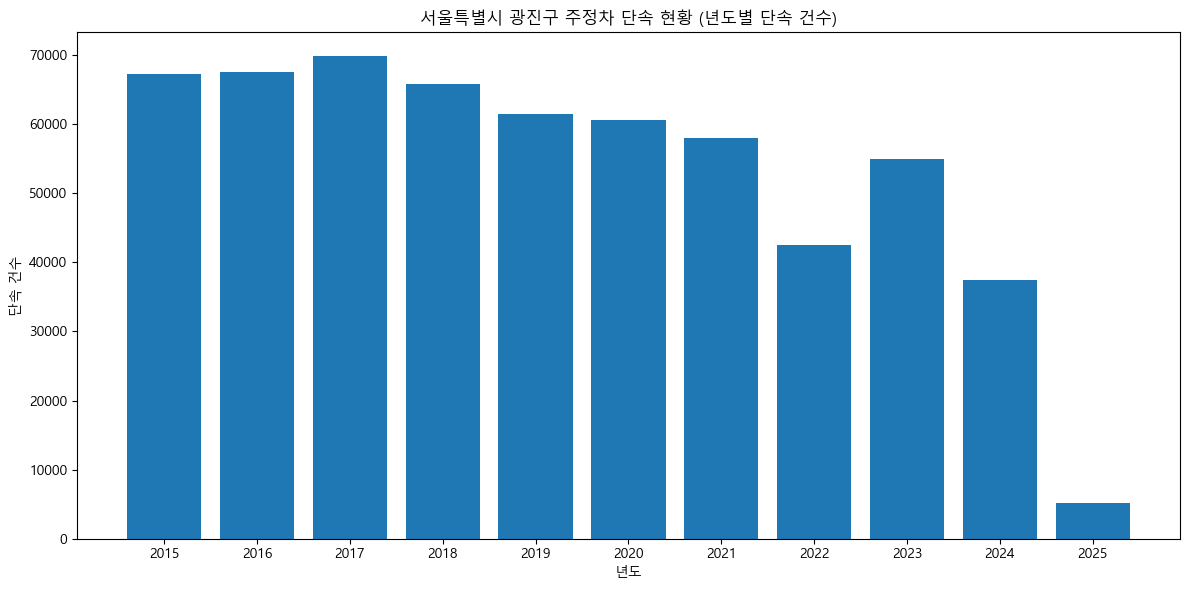

In [3]:
# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index.astype(str), year_counts.values)  # x축 레이블을 문자열로 변환하여 표시
plt.title('서울특별시 광진구 주정차 단속 현황 (년도별 단속 건수)')
plt.xlabel('년도')
plt.ylabel('단속 건수')
plt.tight_layout()
plt.show()

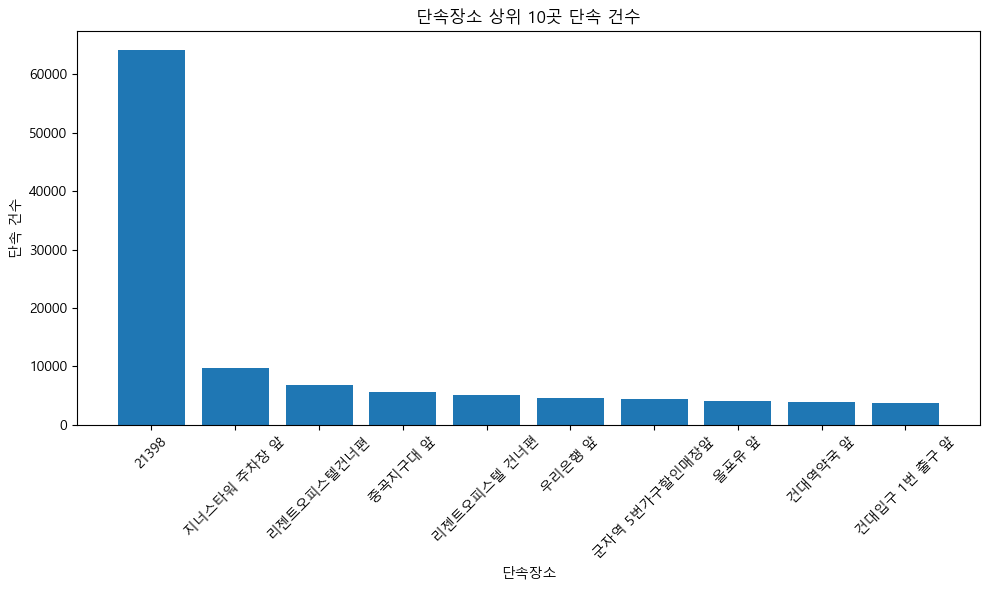

In [4]:
# %% 단속장소별 단속 건수 집계 (결측치 제거 후)
location_counts_top10 = illegal_df['단속장소'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(location_counts_top10.index, location_counts_top10.values)
plt.title('단속장소 상위 10곳 단속 건수')
plt.xlabel('단속장소')
plt.ylabel('단속 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# CSV 파일 로드 (인코딩: cp949)
cctv_df = pd.read_csv(os.path.join(base_path, cctv_parking_file), encoding='cp949')
# 단속일시 컬럼을 datetime 형식으로 변환 (오류 있는 데이터는 NaT 처리)
cctv_df['단속일시'] = pd.to_datetime(cctv_df['단속지점명'], errors='coerce')
cctv_df = cctv_df.dropna(subset=['단속지점명'])